This notebook will show the average time complexity of the Binary Search Algorithm found through Monte Carlo Methods. 

In [1]:
# Import necessary libraries

import math
import random as r
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Function that picks a random value between the inputs mi and ma and then runs the 
# binary search algorithm recursively until it chooses correctly which then executes
# a condition to return the number of guesses that took place. Notice that
# numguess must be initialied at 0 before running this function

def game(mi,ma):
        global numguess
        numguess += 1
        g = math.floor((mi+ma)/2)
        if g == randnum:
            return numguess
        else:
            if randnum > g:
                mi = g+1
            else:
                ma = g-1       
            game(mi,ma)

In [3]:
# nList provides n values for the range between mi and ma
# nIter set to 100,000 for the Monte Carlo Method to provide a very accurate representation for each n value
# gAvgs is an initialized list to append the average number of guesses it took for each value n over the nIter iterations
# log2 is an initialized list to append the log2(n) which is considered the worst case scenario for this algo

nList = [5, 7, 9, 12, 15, 20, 25, 30, 40, 50, 75, 100, 150, 250, 
         500, 1000, 5000, 10000, 100000, 500000, 1000000]
nIter = 100000
gAvgs = []
log2 = []

In [4]:
# Here is the core of this project. Run a for loop for each n value in nList which eventually runs another
# for loop that will run nIter number of times gthering the sum of the number of guesses for each simulation
# which then is used to calculate the average to append to gAvgs

for n in nList:
    mi = 1
    gSum = 0
    log2.append(math.log2(n))
    for i in range(nIter):
        randnum = r.randint(mi,n)
        numguess = 0
        game(mi,n)
        gSum += numguess
    gAvgs.append(gSum/nIter)

In [5]:
# dic is the creation of the dictionary to then feed into the pandas dataframe function which is called df.
# Create Diff column containing the difference between log2(n) and Avg_Guess columns and display df

dic = {"n":nList,"Avg_Guess":gAvgs, "log2(n)":log2}
df = pd.DataFrame(dic)
df['Diff'] = df['log2(n)'] - df['Avg_Guess']
display(df)

,n,Avg_Guess,log2(n),Diff
0,5,2.20095,2.321928,0.120978
1,7,2.43064,2.807355,0.376715
2,9,2.78383,3.169925,0.386095
3,12,3.08954,3.584963,0.495423
4,15,3.27066,3.906891,0.636231
5,20,3.69791,4.321928,0.624018
6,25,3.96378,4.643856,0.680076
7,30,4.13460,4.906891,0.772291
8,40,4.57383,5.321928,0.748098
9,50,4.85757,5.643856,0.786286


Notice that the "actual" value calculated by log2(n) is consistently
.1-1 greater than that of the corresponding Monte Carlo Method approximation Avg_Guess
as displayed in the Diff column. This makes sense though since the log2(n) represents the worst case
scenario due to how the O(log2(n)) is derived mathematically. Another interesting and intuitive outcome here 
is that the Diff values tend to get bigger as the value n grows.

In [6]:
# This function is meant to take the data above which can be modeled with a log function and output
# the parameters for regression of the function y = aln(x) + b, specifically x = [a, b]. The lambda function
# next will use the parameters a and b so make sure to call this function in this manner:
# should be called like so: a,b = log_least_sq(...)

def log_least_sq(df, x_name, y_name):
    y = np.matrix(np.array(df.loc[:,[y_name]]))
    onest = np.transpose(np.ones([df.shape[0],1]))
    log = np.log(np.array(df.loc[:,[x_name]]))
    logt = np.transpose(log)
    A = np.transpose(np.matrix([logt[0], onest[0]]))
    Q,R = np.linalg.qr(A)
    d = np.transpose(Q)*y
    x = np.linalg.solve(R, d)
    return float(x[0]), float(x[1])

In [7]:
# Quick lambda function using the found parameters

f = lambda n: a*math.log(n) + b

In [8]:
# Get parameters, map inputs, create new dataframe

a,b = log_least_sq(df, 'n', 'Avg_Guess')
print('a:',a )
print('b:',b)
n = list(np.arange(4, 100000, 3))
y =  list(map(f, n))
df = pd.DataFrame({'n':n,'f':y})

a: 1.3962011005396917
b: -0.4924578596109646


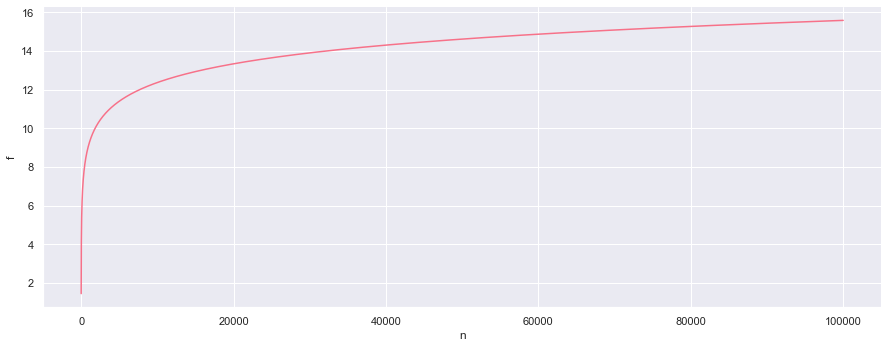

In [10]:
# Display the function

sns.set(style='darkgrid', palette='husl')
sns.relplot(x='n', y='f', data=df, aspect=2.5, kind='line')
plt.show()

In [12]:
display(f(5), f(20), f(50), f(100), f(1000))

1.7546411249798304

3.6901868376473903

4.969512965904405

5.937285822238186

9.15215766316276